In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [3]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


In [10]:
class layer:
    def __init__(self, z, bias):
        self.bias = bias
        self.z = z
    def y(self, straw_id):
        return 499 - self.bias - straw_id * 1.76
    
class coordinates:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

In [4]:
l1000 = layer(2581.15, 0.5*0.9828)
l1001 = layer(2582.25, 0.5*0.9828 - 0.88)
l1010 = layer(2584.85, 0.5*0.9828 - 0.44)
l1011 = layer(2585.95, 0.5*0.9828 - 0.44 - 0.88)
   
l1300 = layer(2611.15, 0.5*0.9828)
l1301 = layer(2612.25, 0.5*0.9828 - 0.88)
l1310 = layer(2614.85, 0.5*0.9828 - 0.44)
l1311 = layer(2615.95, 0.5*0.9828 - 0.44 - 0.88)

l2000 = layer(2781.15, 0.5*0.9828)
l2001 = layer(2782.25, 0.5*0.9828 - 0.88)
l2010 = layer(2784.85, 0.5*0.9828 - 0.44)
l2011 = layer(2785.95, 0.5*0.9828 - 0.44 - 0.88)

l2300 = layer(2811.15, 0.5*0.9828)
l2301 = layer(2812.25, 0.5*0.9828 - 0.88)
l2310 = layer(2814.85, 0.5*0.9828 - 0.44)
l2311 = layer(2815.95, 0.5*0.9828 - 0.44 - 0.88)

d ={'1000':l1000, '1001':l1001, '1010':l1010, '1011':l1011, '1300':l1300, '1301':l1301, '1310':l1310, '1311':l1311,
   '2000':l2000, '2001':l2001, '2010':l2010, '2011':l2011, '2300':l2300, '2301':l2301, '2310':l2310, '2311':l2311}

In [9]:
#для отбора хитов отдельного слоя
def selector(data, StatNb, ViewNb, PlaneNb, LayerNb):
    return data[(data.StatNb==StatNb)&(data.ViewNb==ViewNb)&(data.PlaneNb==PlaneNb)&(data.LayerNb==LayerNb)]
# восстанавливает по крайним точкам отрезка коэффициент наклона и смещение
def get_planeYZ(point1, point2):
    y1 = point1[0]
    z1 = point1[1]
    y2 = point2[0]
    z2 = point2[1]
    
    #y = kz + b
    k = float(y2 - y1)/float(z2 - z1)
    b = y1 - k*z1
    return k, b

In [6]:
def alternative_find_hits_planeYZ(plane_k, plane_b, plane_width, layer_code, layer_data):
    l = d[layer_code]
    lower_y = plane_k * l.z + plane_b - 1. * plane_width / np.cos(np.arctan(plane_k))
    upper_y = plane_k * l.z + plane_b + 1. * plane_width / np.cos(np.arctan(plane_k))
    lower_ind = ceil((lower_y - 499. + l.bias) / 1.76)
    upper_ind = floor((upper_y - 499. + l.bias) / 1.76)
    return layer_data[(layer_data['StrawNb'] <= upper_ind) & (layer_data['StrawNb'] >= lower_ind)]

In [7]:
def alternative_finder(n_hits, event):
    start_y = []
    start_z = d['1000'].z
    end_y = []
    end_z = d['2311'].z
    for i in range(567):
        start_y += [d['1000'].y(i),]
        end_y += [d['2311'].y(i),]

    l_event1000 = selector(event, 1, 0, 0, 0)
    l_event1001 = selector(event, 1, 0, 0, 1)
    l_event1010 = selector(event, 1, 0, 1, 0)
    l_event1011 = selector(event, 1, 0, 1, 1)

    l_event1300 = selector(event, 1, 3, 0, 0)
    l_event1301 = selector(event, 1, 3, 0, 1)
    l_event1310 = selector(event, 1, 3, 1, 0)
    l_event1311 = selector(event, 1, 3, 1, 1)

    l_event2000 = selector(event, 2, 0, 0, 0)
    l_event2001 = selector(event, 2, 0, 0, 1)
    l_event2010 = selector(event, 2, 0, 1, 0)
    l_event2011 = selector(event, 2, 0, 1, 1)

    l_event2300 = selector(event, 2, 3, 0, 0)
    l_event2301 = selector(event, 2, 3, 0, 1)
    l_event2310 = selector(event, 2, 3, 1, 0)
    l_event2311 = selector(event, 2, 3, 1, 1)
    
    recognized_tracks=pd.DataFrame()
    PredictID=1
    for i in start_y:
        for j in end_y:
            k, b = get_planeYZ((i, start_z), (j, end_z))
            points1000 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1000', l_event1000)
            points1001 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1001', l_event1001)
            points1010 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1010', l_event1010)
            points1011 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1011', l_event1011)

            points1300 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1300', l_event1300)
            points1301 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1301', l_event1301)
            points1310 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1310', l_event1310)
            points1311 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '1311', l_event1311)

            points2000 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2000', l_event2000)
            points2001 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2001', l_event2001)
            points2010 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2010', l_event2010)
            points2011 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2011', l_event2011)

            points2300 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2300', l_event2300)
            points2301 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2301', l_event2301)
            points2310 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2310', l_event2310)
            points2311 = alternative_find_hits_planeYZ(k, b, 0.5*0.9828, '2311', l_event2311)

            list_points = [points1000, points1001, points1010, points1011,
                           points1300, points1301, points1310, points1311,
                           points2000, points2001, points2010, points2011,
                           points2300, points2301, points2310, points2311]
            hits_count = 0
            for p in list_points:
                if p.shape[0] != 0:
                    hits_count += p.shape[0]
            
            if hits_count >= n_hits:
                table_points = pd.concat(list_points)
                table_points['PredictID']=PredictID
                recognized_tracks.append(list_points)
                PredictID += 1
        print i
    return recognized_tracks

In [107]:
event0 = all_hits[all_hits['event']==2]
set(event0['TrackID'])

{2.0, 3.0}

In [1]:
alternative_finder(7, event0)

NameError: name 'alternative_finder' is not defined

In [22]:
def add_centres(event):    
    layer1000 = selector(event, 1, 0, 0, 0)
    layer1001 = selector(event, 1, 0, 0, 1)
    layer1010 = selector(event, 1, 0, 1, 0)
    layer1011 = selector(event, 1, 0, 1, 1)

    layer1300 = selector(event, 1, 3, 0, 0)
    layer1301 = selector(event, 1, 3, 0, 1)
    layer1310 = selector(event, 1, 3, 1, 0)
    layer1311 = selector(event, 1, 3, 1, 1)

    layer2000 = selector(event, 2, 0, 0, 0)
    layer2001 = selector(event, 2, 0, 0, 1)
    layer2010 = selector(event, 2, 0, 1, 0)
    layer2011 = selector(event, 2, 0, 1, 1)

    layer2300 = selector(event, 2, 3, 0, 0)
    layer2301 = selector(event, 2, 3, 0, 1)
    layer2310 = selector(event, 2, 3, 1, 0)
    layer2311 = selector(event, 2, 3, 1, 1)
    
    #1-y1
    z1000 = 2598. - 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
    layer1000['Wy'] = -(0.5*0.9828 + 1.76*(layer1000.StrawNb.values-1)) + 499
    layer1000['Wz'] = np.ones(layer1000.shape[0])*z1000

    z1001 = z1000 + 1.1
    layer1001['Wy'] = -(0.5*0.9828 - 0.88 + 1.76*(layer1001.StrawNb.values-1)) + 499
    layer1001['Wz'] = np.ones(layer1001.shape[0])*z1001

    z1010 = z1000 + 2.6
    layer1010['Wy'] = -(0.5*0.9828 - 0.44 + 1.76*(layer1010.StrawNb.values-1)) + 499
    layer1010['Wz'] = np.ones(layer1010.shape[0])*z1010

    z1011 = z1010 + 1.1
    layer1011['Wy'] = -(0.5*0.9828 - 0.44 - 0.88 + 1.76*(layer1011.StrawNb.values-1)) + 499
    layer1011['Wz'] = np.ones(layer1011.shape[0])*z1011

    #1-y2
    z1300 = 2598. + 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
    layer1300['Wy'] = -(0.5*0.9828 + 1.76*(layer1300.StrawNb.values-1)) + 499
    layer1300['Wz'] = np.ones(layer1300.shape[0])*z1300

    z1301 = z1300 + 1.1
    layer1301['Wy'] = -(0.5*0.9828 - 0.88 + 1.76*(layer1301.StrawNb.values-1)) + 499
    layer1301['Wz'] = np.ones(layer1301.shape[0])*z1301

    z1310 = z1300 + 2.6
    layer1310['Wy'] = -(0.5*0.9828 - 0.44 + 1.76*(layer1310.StrawNb.values-1)) + 499
    layer1310['Wz'] = np.ones(layer1310.shape[0])*z1310

    z1311 = z1310 + 1.1
    layer1311['Wy'] = -(0.5*0.9828 - 0.44 - 0.88 + 1.76*(layer1311.StrawNb.values-1)) + 499
    layer1311['Wz'] = np.ones(layer1311.shape[0])*z1311

    #2-y1
    z2000 = 2798. - 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
    layer2000['Wy'] = -(0.5*0.9828 + 1.76*(layer2000.StrawNb.values-1)) + 499
    layer2000['Wz'] = np.ones(layer2000.shape[0])*z2000

    z2001 = z2000 + 1.1
    layer2001['Wy'] = -(0.5*0.9828 - 0.88 + 1.76*(layer2001.StrawNb.values-1)) + 499
    layer2001['Wz'] = np.ones(layer2001.shape[0])*z2001

    z2010 = z2000 + 2.6
    layer2010['Wy'] = -(0.5*0.9828 - 0.44 + 1.76*(layer2010.StrawNb.values-1)) + 499
    layer2010['Wz'] = np.ones(layer2010.shape[0])*z2010

    z2011 = z2010 + 1.1
    layer2011['Wy'] = -(0.5*0.9828 - 0.44 - 0.88 + 1.76*(layer2011.StrawNb.values-1)) + 499
    layer2011['Wz'] = np.ones(layer2011.shape[0])*z2011

    #2-y2
    z2300 = 2798. + 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
    layer2300['Wy'] = -(0.5*0.9828 + 1.76*(layer2300.StrawNb.values-1)) + 499
    layer2300['Wz'] = np.ones(layer2300.shape[0])*z2300

    z2301 = z2300 + 1.1
    layer2301['Wy'] = -(0.5*0.9828 - 0.88 + 1.76*(layer2301.StrawNb.values-1)) + 499
    layer2301['Wz'] = np.ones(layer2301.shape[0])*z2301

    z2310 = z2300 + 2.6
    layer2310['Wy'] = -(0.5*0.9828 - 0.44 + 1.76*(layer2310.StrawNb.values-1)) + 499
    layer2310['Wz'] = np.ones(layer2310.shape[0])*z2310

    z2311 = z2310 + 1.1
    layer2311['Wy'] = -(0.5*0.9828 - 0.44 - 0.88 + 1.76*(layer2311.StrawNb.values-1)) + 499
    layer2311['Wz'] = np.ones(layer2311.shape[0])*z2311
    
    layers = [layer1000, layer1001, layer1010, layer1011,
              layer1300, layer1301, layer1310, layer1311,
              layer2000, layer2001, layer2010, layer2011,
              layer2300, layer2301, layer2310, layer2311]

    return pd.concat(layers, axis=0)

In [46]:
def conventor(event):
    event = add_centres(event)
    dictionary = {}
    for i in event.Wz.values:
        dictionary[i] = []
    for i in event.index:
        dictionary[event.Wz[i]].append((event.Wy[i], event.dist2Wire[i]))
    return dictionary

In [80]:
def points_crossing_line(plane_k, plane_b, plane_width, dictionary, n_min):
    lower_y = 0.
    upper_y = 0.
    crossing_points = {}
    for i in dictionary.keys():
        crossing_points[i] = []
    for i in dictionary.keys():
        lower_y = plane_k * i + plane_b - 1. * plane_width / np.cos(np.arctan(plane_k))
        upper_y = plane_k * i + plane_b + 1. * plane_width / np.cos(np.arctan(plane_k))
        for j in dictionary[i]:
            if ((j[0] < upper_y) & (j[0] > lower_y)):
                crossing_points[i].append(j)
    n_hits = 0
    for i in crossing_points.keys():
        n_hits += len(crossing_points[i])
    if n_hits < n_min:
        return 0, crossing_points
    else:
        return 1, crossing_points

In [87]:
def find_candidates(event, n_min, plane_width):
    event_ext = add_centres(event)
    dictionary = conventor(event_ext)
    start_layer = layer(2581.15, 0.5*0.9828)
    end_layer = l2311 = layer(2815.95, 0.5*0.9828 - 0.44 - 0.88)
    start_y = []
    start_z = start_layer.z
    end_y = []
    end_z = end_layer.z
    for i in range(567):
        start_y += [start_layer.y(i),]
        end_y += [end_layer.y(i),]
    tracks = []
    for i in start_y:
        for j in end_y:
            k, b = get_planeYZ((i, start_z), (j, end_z))
            indicator, crossing_points = points_crossing_line(k, b, plane_width, dictionary, n_min)
            if indicator == 1:
                tracks.append((k, b, crossing_points))
    return tracks

In [131]:
tracks = find_candidates(event0, 7, 0.8)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

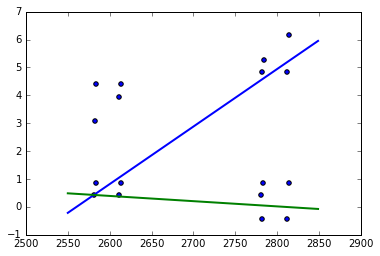

In [132]:
plt.scatter(add_centres(event0)['Wz'], add_centres(event0)['Wy'])
for i in tracks:
    t = np.arange(2550, 2850, 299)
    plt.plot(t, i[0] * t + i[1], lw = 2)

In [121]:
event0['TrackID'].values.astype(int)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [120]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])